# Intro

* Loading Data and Libraries

In [1]:
# loading libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from pylab import rcParams
import seaborn as sns

In [2]:
# reading dataset

df = pd.read_csv("pre-processed.csv")
print("the dataset has " + str(df.shape[0]) + " observations (ice cream flavors) and " + str(df.shape[1]) + " features " + str([col for col in df.columns]))

# dataset: https://www.kaggle.com/datasets/tysonpo/ice-cream-dataset

# Inspiration Notebooks:
# Using Ice Cream Ingredients to Predict Rating: https://www.kaggle.com/code/gcdatkin/using-ice-cream-ingredients-to-predict-rating
# Finding the Best Ice Cream: https://www.kaggle.com/code/kelvintran1998/finding-the-best-ice-cream
# EDA ideas: McDonalds Ice Cream Machines Breaking: https://www.kaggle.com/code/aashidutt3/eda-mcdonalds-ice-cream-machines-breaking

the dataset has 241 observations (ice cream flavors) and 5 features ['brand', 'name', 'rating', 'rating_count', 'ingredients']


In [3]:
df.head(10)

,brand,name,rating,rating_count,ingredients
0,BenJerrys,Salted Caramel Core,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
1,BenJerrys,Netflix & Chilll'd™,4.0,127,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
2,BenJerrys,Chip Happens,4.7,130,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."
3,BenJerrys,Cannoli,3.6,70,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
4,BenJerrys,Gimme S’more!™,4.5,281,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ..."
5,BenJerrys,Peanut Butter Half Baked®,4.9,14,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."
6,BenJerrys,Berry Sweet Mascarpone,4.6,10,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ..."
7,BenJerrys,Chocolate Peanut Butter Split,5.0,7,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
8,BenJerrys,Justice ReMix'd ™,4.3,110,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."
9,BenJerrys,Boots on the Moooo’n™,4.7,42,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."


In [4]:
# generate csv gist
# df.head().to_csv('icecream2_head.csv', index=False, header=True, encoding='cp1252')

# Correcting the ingredient list and getting an unique list with all Ingredients

I want to generate an unique set of ingredients to each ice cream to check if that their rating is determined by ingredients.

With the unique ingredients set I will compare the top10 and bottom10 ingredients lists.

And finally, in the next phase, I will use these unique ingredients set to create a dummy matrix do the machine learning modeling.

However, the ingredient lists contains various formatting problems and we need to fix that.

* Data Cleaning

In [5]:
# increasing column character limit for better visualization

pd.set_option('display.max_colwidth', 50000)

In [6]:
# leave the ingredients column in lower case.

df['ingredients_cleaned'] = df['ingredients'].str.lower()
df['ingredients_cleaned'].head()

0                                   cream, skim milk, liquid sugar (sugar, water), water, brown sugar, sugar, milk, wheat flour, egg yolks, corn syrup, eggs, butter (cream, salt), butteroil, pectin, sea salt, soybean oil, vanilla extract, guar gum, soy lecithin, baking powder (sodium acid pyrophosphate, sodium bicarbonate, corn starch, monocalcium phosphate), baking soda, salt, carrageenan, lactase
1                                                                          cream, skim milk, liquid sugar (sugar, water), water, sugar, peanuts, wheat flour, canola oil, egg yolks, corn starch, peanut oil, cocoa powder, salt, soybean oil, invert cane sugar, milk fat, eggs, egg whites, guar gum, soy lecithin, tapioca starch, baking soda, carrageenan, vanilla extract, barley malt, malted barley flour
2    cream, liquid sugar (sugar, water), skim milk, water, sugar, cocoa (processed with alkali), potato, coconut oil, corn syrup solids, soybean oil, egg yolks, rice starch, sunflower oil, barley 

In [7]:
# checking for all unique ingredients to find errors

all_ingredients = set()

for row in df.iterrows():
    ingredients = df.loc[row[0], 'ingredients_cleaned']
    for ingredient in ingredients.split(','):
        if ingredient not in all_ingredients:
            all_ingredients.add(ingredient)

# iterrows(): returns a tuple containing the index and the rest of the row

In [8]:
#printing the all_ingredients set to check formatting problems

all_ingredients

# we can se all the problems with the description ingredients (that subingredients of an ingredient)

# 1) parentheses capture all the content inside parentheses
# 2) AND and OR
# 3) special characters
# 4) excess of whitespace
# 5) use of synonyms or equivalent ingredients

{'  water',
 ' acesulfame potassium',
 ' almond extract',
 ' almonds',
 ' almonds roasted in vegetable oil',
 ' and/or baking soda',
 ' and/or calcium phosphate',
 ' and/or canola oil',
 ' and/or palm oil',
 ' and/or sunflower oil)',
 ' anhydrous milkfat',
 ' annatto (color)',
 ' annatto (for color)',
 ' apple juice',
 ' artificial color',
 ' artificial flavor',
 ' artificial flavoring',
 ' artificial flavors',
 ' ascorbic acid',
 ' baking powder',
 ' baking powder (sodium acid pyrophosphate',
 ' baking soda',
 ' baking soda and/or calcium phosphate',
 ' baking soda. contains milk',
 ' balsamic vinegar (red wine vinegar',
 ' banana puree',
 ' bananas',
 ' barley malt',
 ' beet juice (for color)',
 ' belgian chocolate',
 ' black carrot concentrate (for color)',
 ' black cherries',
 ' black raspberries',
 ' black raspberry puree',
 ' blackberry juice concentrate',
 ' bleached wheat flour',
 ' blue 1',
 ' blue 1 lake',
 ' blue 2',
 ' blue 2 lake',
 ' blueberries',
 ' blueberry puree conce

In [9]:
# importing regex module
import re

In [10]:
# eliminating content inside parentheses '()'

df['ingredients_cleaned'] = df['ingredients_cleaned'].str.replace(r'\([^()]*\)',"", regex=True)
df['ingredients_cleaned'].head() # checking

0                                                                                                            cream, skim milk, liquid sugar , water, brown sugar, sugar, milk, wheat flour, egg yolks, corn syrup, eggs, butter , butteroil, pectin, sea salt, soybean oil, vanilla extract, guar gum, soy lecithin, baking powder , baking soda, salt, carrageenan, lactase
1                                                   cream, skim milk, liquid sugar , water, sugar, peanuts, wheat flour, canola oil, egg yolks, corn starch, peanut oil, cocoa powder, salt, soybean oil, invert cane sugar, milk fat, eggs, egg whites, guar gum, soy lecithin, tapioca starch, baking soda, carrageenan, vanilla extract, barley malt, malted barley flour
2    cream, liquid sugar , skim milk, water, sugar, cocoa , potato, coconut oil, corn syrup solids, soybean oil, egg yolks, rice starch, sunflower oil, barley malt, cocoa powder, wheat flour, milk, salt, soy lecithin, yeast extract, natural flavor, guar gum, sea salt, m

In [11]:
# remove_excess_whitespace

df['ingredients_cleaned'] = df['ingredients_cleaned'].str.replace(r'\s*,\s*',", ", regex=True)
df['ingredients_cleaned'].head() # checking results

0                                                                                                             cream, skim milk, liquid sugar, water, brown sugar, sugar, milk, wheat flour, egg yolks, corn syrup, eggs, butter, butteroil, pectin, sea salt, soybean oil, vanilla extract, guar gum, soy lecithin, baking powder, baking soda, salt, carrageenan, lactase
1                                                  cream, skim milk, liquid sugar, water, sugar, peanuts, wheat flour, canola oil, egg yolks, corn starch, peanut oil, cocoa powder, salt, soybean oil, invert cane sugar, milk fat, eggs, egg whites, guar gum, soy lecithin, tapioca starch, baking soda, carrageenan, vanilla extract, barley malt, malted barley flour
2    cream, liquid sugar, skim milk, water, sugar, cocoa, potato, coconut oil, corn syrup solids, soybean oil, egg yolks, rice starch, sunflower oil, barley malt, cocoa powder, wheat flour, milk, salt, soy lecithin, yeast extract, natural flavor, guar gum, sea salt, milkfat

In [12]:
# because this will be a repetitive task, let's create a function for spliting text: corrects and process text

def ingredients_processing(text):
    bool = df['ingredients_cleaned'].str.contains(text, regex=False)
    val_to_replace = df['ingredients_cleaned'][bool].str.split(text).str[0]
    df['ingredients_cleaned'] = df['ingredients_cleaned'].mask(bool, val_to_replace)
    return

In [13]:
# problematic text: spliting by and selecting only first column

problematic_text_ingredients_list = ['\ncontains', 'contains', '.']

for text in problematic_text_ingredients_list:
    ingredients_processing(text)

df['ingredients_cleaned'] #checking results

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     cream, skim milk, liquid sugar, water, brown sugar, sugar, milk, wheat flour, egg yolks, corn syrup, eggs, butter, butteroil, pectin, sea salt, soybean oil, vanilla extract, guar gum, soy lecithin, baking powder, baking soda, salt, carrageenan, lactase
1                                                                                                    

In [14]:
# observations with ':' problem - spliting by and selecting only second column

bool = df['ingredients_cleaned'].str.contains(":", regex=False)
val_to_replace = df['ingredients_cleaned'][bool].str.split(": ").str[1] # here we will use the second column, not the first
df['ingredients_cleaned'] = df['ingredients_cleaned'].mask(bool, val_to_replace)

df['ingredients_cleaned'] #checking results

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     cream, skim milk, liquid sugar, water, brown sugar, sugar, milk, wheat flour, egg yolks, corn syrup, eggs, butter, butteroil, pectin, sea salt, soybean oil, vanilla extract, guar gum, soy lecithin, baking powder, baking soda, salt, carrageenan, lactase
1                                                                                                    

* Data Treatment: Manual Correction

In [15]:
# checking tests

#df[df['ingredients_cleaned'].str.contains("mono and diglycerides", regex=False)] == True
#df[df['ingredients_cleaned'].str.contains(" and ", regex=False)] == True
#df[df['ingredients_cleaned'].str.contains("and/or", regex=False)] == True
#df[df['ingredients_cleaned'].str.contains("†", regex=False)] == True
#df[df['ingredients_cleaned'].str.contains("*", regex=False)] == True
#df[df['ingredients_cleaned'].str.contains(")", regex=False)] == True
#df[df['ingredients_cleaned'].str.contains("/", regex=False)] == True
#df[df['ingredients_cleaned'].str.contains("vanilla ice cream", regex=False) == True]

In [16]:
# treating the problem with 'mono and diglycerides'

df['ingredients_cleaned'] = df['ingredients_cleaned'].str.replace("mono and diglycerides", "monoglycerides, diglycerides", regex=False)

In [17]:
# treating the problem with 'and/or' + 'and':

unwanted_text = [' and ', 'and/or']

for word in unwanted_text:
    df['ingredients_cleaned'] = df['ingredients_cleaned'].str.replace(word, ',', regex=False)

In [18]:
# replacing strange text to ''

unwanted_text = ['†', ')' , 'organic', 'pasteurized','(sugar', 'unbleached', 'enriched', 'unenriched', 'vanilla ice cream', 'coffee ice cream', 'white chocolate ice cream', 
'unsweetened', 'whole', 'pieces', 'concentrates', 'concentrate', 'juice', 'pasteurized', 'puree',  'vegetable s', ' lake']

for word in unwanted_text:
    df['ingredients_cleaned'] = df['ingredients_cleaned'].str.replace(word, '', regex=False)

In [19]:
# replacing strange text to ' '

unwanted_text = ['*', '/']

for word in unwanted_text:
    df['ingredients_cleaned'] = df['ingredients_cleaned'].str.replace(word, ' ', regex=False)

In [20]:
# Word Correcting

# Ok. I'm feeling very dumb for doing this checking mannually. 

# PorterStemmer() and stem function(): # takes all words and break them down to their root. This reduces significantly duplicated words (ex: egg x eggs)
# I could use these libraries, which are based on suffixes in the English language.
# However, after some tests, i'm not feeling very confident to use that method because there are many errors.

# Creating a dictionary
word_correcting = {"reese's mini ": "reese's peanut butter", "reese's peanut butter cup ": "reese's peanut butter", "reese's peanut butter cups": "reese's peanut butter",
                   "reese's peanut butter sauce": "reese's peanut butter", "reese's peanut butter swirl": "reese's peanut butter", 'almonds roasted in vegetable oil': 'almonds',
                   'roasted almonds': 'almonds', 'dried apples': 'apple', 'apples': 'apple', 'artificial color lake': 'artificial color', 'color added': 'artificial color',
                   'annatto': 'artificial color', 'blue 1': 'artificial color', 'blue 1': 'artificial color', 'blue 1 lake': 'artificial color', 'blue 2': 'artificial color',
                   'blue 2 lake': 'artificial color', 'yellow 5': 'artificial color', 'yellow 5 lake': 'artificial color', 'yellow 6': 'artificial color', 'yellow 6 lake': 'artificial color',
                   'red 40': 'artificial color', 'red 40 lake': 'artificial color', 'reb a': 'artificial color', 'artificial color lake': 'artificial color',
                   'artificial flavoring': 'artificial flavor', 'artificial flavors': 'artificial flavor', 'banana puree': 'banana', 'bananas': 'banana', 'black carrot s': 'black carrot',
                   'black raspberry puree': 'black raspberry', 'black raspberries': 'black raspberry', 'blueberries': 'blueberry', 'butteroil': 'butter', 'butterfat': 'butter',
                   'butter oil': 'butter', 'dried cane syrup': 'cane syrup', 'caramelized sugar': 'caramel', 'caramel color': 'caramel', 'caramel flavor': 'caramel',
                   'caramel swirl': 'caramel', 'caramel syrup': 'caramel', 'caramelized sugar syrup': 'caramelized sugar', 'carob bean': 'carob bean gum', 'carob gum': 'carob bean gum',
                   'cheese cultures': 'cheese culture', 'cherries': 'cherry', 'cherry': 'cherry', 'cherry puree': 'cherry', 'cherry concentrate': 'cherry', 'cherry juice concentrate': 'cherry',
                   'chocolate chip cookies': 'chocolate', 'chocolate chips': 'chocolate', 'chocolate cookie pieces': 'chocolate', 'chocolate flavored coating': 'chocolate', 'chocolate liquor':
                   'chocolate', 'chocolate processed with alkali': 'chocolate', 'chocolatey chips': 'chocolate', 'milk chocolate candies': 'chocolate',
                   'milk chocolate': 'chocolate','dark chocolate': 'chocolate', 'semi-sweet chocolate chunks': 'chocolate', 'chocolaty coated cone': 'chocolatey coated cone',
                   'black cocoa processed with alkali': 'cocoa powder', 'dutched cocoa': 'cocoa powder', 'coconut concentrate': 'coconut', 'coconut cream': 'coconut', 'coconut extract': 'coconut',
                   'desiccated coconut': 'coconut', 'coffee extract': 'coffee', 'coffee extract concentrate': 'coffee', 'condensed skim milk': 'condensed milk',
                   'evaporated milk': 'condensed milk', 'sweetened condensed milk': 'condensed milk', 'sweetened condensed skim milk': 'condensed milk', 'corn syrup solids': 'corn syrup',
                   'high fructose corn syrup': 'corn syrup', 'corn starch': 'cornstarch', 'modified corn starch': 'cornstarch', 'modified food starch': 'cornstarch',
                   'modified cornstarch': 'cornstarch', 'eggs': 'egg', 'whole egg': 'egg', 'whole eggs': 'egg', 'egg whites': 'egg white',
                   'egg yolks': 'egg yolk', 'guar': 'guar gum', 'ground heath toffee': 'heath toffee bar', 'hibiscus flower': 'hibiscus', 'hibiscus powder': 'hibiscus',
                   'invert cane sugar': 'inverted sugar syrup', 'invert sugar': 'inverted sugar syrup', 'lactase enzyme': 'lactase', 'lemon juice': 'lemon', 'lemon juice concentrate': 'lemon',
                   'locust bean': 'locust bean gum', 'dry malt extract': 'malt extract', 'maltitol': 'maltitol syrup', 'corn maltodextrin': 'maltodextrin', 'mango puree': 'mango',
                   'mangos': 'mango', 'organic milk': 'milk', 'anhydrous milkfat': 'milk fat', 'milkfat': 'milk fat', 'nonfat milk solids': 'milk powder', 'nonfat dry milk': 'milk powder',
                   'whole milk powder': 'milk powder', 'skim milk powder': 'milk powder', 'natural flavors': 'natural flavor', 'rolled oats': 'oats', 'vitamin a palm oil oilitate': 'palm oil',
                   '^palm$': 'palm oil', 'palm': 'palm oil', 'palm kernel': 'palm oil', 'palm kernel oil': 'palm oil', 'partially defatted peanut flour': 'peanut', 'roasted peanuts': 'peanut',
                   'peppermint bark': 'peppermint', 'peppermint extract': 'peppermint', 'peppermint oil': 'peppermint', 'peppermint twists candy': 'peppermint', 'pistachio paste': 'pistachio',
                   'pistachios': 'pistachio', 'raspberries': 'raspberry', 'raspberry swirl': 'raspberry', 'sea salt': 'salt', 'organic skim milk': 'skim milk', 'lactose reduced skim milk': 'skim milk',
                   'nonfat milk': 'skim milk', 'soy lecithin': 'soybean lecithin', 'soybean lecithin natural flavor': 'soybean lecithin','soybean oils': 'soybean oil',
                   'expeller pressed soybean oil': 'soybean oil', 'spice': 'spices', 'strawberries': 'strawberry', 'strawberry swirl': 'strawberry',
                   'powdered sugar': 'sugar', 'cane sugar': 'sugar', 'liquid sugar': 'sugar syrup', 'sunflower oils': 'sunflower oil', 'tapioca flour': 'tapioca', 'tapioca starch': 'tapioca',
                   'tapioca syrup': 'tapioca', 'tara': 'tara gum', 'thiamin mononitrate': 'thiamine mononitrate', 'vanilla bean seeds': 'vanilla', 'vanilla beans': 'vanilla',
                   'vanilla extract': 'vanilla', 'ground vanilla': 'vanilla', 'processed vanilla': 'vanilla', 'vegetable gums': 'vegetable gum', 'vegetable oil coating': 'vegetable oil',
                   'waffle cone': 'waffle cone pieces', 'un wheat flour': 'wheat flour', 'bleached wheat flour': 'wheat flour', 'whey protein concentrate': 'whey',
                   'milk protein concentrate': 'whey', 'whey protein': 'whey', 'heavy cream': 'cream'
}

In [21]:
# using the dictionary to correct wrong words

df['ingredients_cleaned'] = df['ingredients_cleaned'].replace(word_correcting, regex=True)

In [22]:
# making other corrections manually 
# problems like repeated words and excess of whitespace

df['ingredients_cleaned'] = df['ingredients_cleaned'].replace(' , ', ', ') # trim excess of whitespace
df['ingredients_cleaned'] = df['ingredients_cleaned'].replace(' , ', ', ') # trim excess of whitespace
df['ingredients_cleaned'] = df['ingredients_cleaned'].replace(',,', ', ') # trim excess of comma
df['ingredients_cleaned'] = df['ingredients_cleaned'].replace(r'"', '') # trim quotation marks
df['ingredients_cleaned'] = df['ingredients_cleaned'].replace(to_replace=r'gum gum', value='gum', regex=True) # duplicated gum words
df['ingredients_cleaned'] = df['ingredients_cleaned'].replace(to_replace=r'oil oil', value='oil', regex=True) # duplicated oil words
df['ingredients_cleaned'] = df['ingredients_cleaned'].replace(to_replace=r'syrup syrup', value='syrup', regex=True) # duplicated syrup words
df['ingredients_cleaned'] = df['ingredients_cleaned'].replace(to_replace=r'peanuts', value='peanut', regex=True)
df['ingredients_cleaned'] = df['ingredients_cleaned'].replace(to_replace=r'palm oil kernel oil', value='palm oil', regex=True)
df['ingredients_cleaned'] = df['ingredients_cleaned'].replace(to_replace=r'palm oil kernel', value='palm oil', regex=True)
df['ingredients_cleaned'] = df['ingredients_cleaned'].replace(to_replace=r'vitamin a palm oilitate', value='vitamin a palmitate', regex=True)
df['ingredients_cleaned'] = df['ingredients_cleaned'].replace(to_replace=r'cocoa processed with alkali', value='cocoa powder', regex=True)
df['ingredients_cleaned'] = df['ingredients_cleaned'].replace(to_replace=r', cocoa,', value=', cocoa powder,', regex=True)
df['ingredients_cleaned'] = df['ingredients_cleaned'].replace(to_replace=r', cocoa,', value=', cocoa powder,', regex=True) # yeah... i really need to do this 2x
df['ingredients_cleaned'] = df['ingredients_cleaned'].replace(to_replace=r'spicess', value='spices', regex=True)
df['ingredients_cleaned'] = df['ingredients_cleaned'].replace(to_replace=r'soybean lecithin natural flavor', value='soybean lecithin', regex=True)
df['ingredients_cleaned'] = df['ingredients_cleaned'].replace(to_replace=r'^\s*,\s*', value='', regex=True) # trim ingredient list wich starts with ','
df['ingredients_cleaned'] = df['ingredients_cleaned'].replace(to_replace=r'^\s+', value='', regex=True) # trim ingredient list wich starts with whitespace
df['ingredients_cleaned'] = df['ingredients_cleaned'].replace(to_replace=r'\s*,\s*', value=', ', regex=True) # trim leading and trailing whitespace
df['ingredients_cleaned'] = df['ingredients_cleaned'].replace(to_replace=r',\s,\s', value=', ', regex=True) # trim excess of comma
df['ingredients_cleaned'] = df['ingredients_cleaned'].replace(to_replace=r'\s{2,}', value='', regex=True) # trim excess of whitespace
df['ingredients_cleaned'] = df['ingredients_cleaned'].replace(to_replace=r'\s+$', value='', regex=True) # remove all whitespaces at the end of a string
df = df.drop('ingredients', axis=1)

df['ingredients_cleaned'] #checking results

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          cream, skim milk, sugar syrup, water, brown sugar, sugar, milk, wheat flour, egg yolk, corn syrup, egg, butter, butter, pectin, salt, soybean oil, vanilla, guar gum, soybean lecithin, baking powder, baking soda, salt, carrageenan, lactase
1                                                                                                                                                                                             

* Data Treatment: unique ingredients list

In [23]:
# convert the ingredients list in a python list

all_ingredients = set()

for row in df.iterrows():
    ingredient_list = df.loc[row[0], 'ingredients_cleaned'].split(', ')
    for ingredient in ingredient_list:
        if ingredient not in all_ingredients:
            all_ingredients.add(ingredient)

In [24]:
#checking the unique ingredients list (set datatype)

all_ingredients

{'acesulfame potassium',
 'almond extract',
 'almond milk',
 'almonds',
 'apple',
 'artificial color',
 'artificial flavor',
 'ascorbic acid',
 'baking powder',
 'baking soda',
 'balsamic vinegar',
 'banana',
 'barley malt',
 'beet',
 'belgian chocolate',
 'black carrot',
 'black cherry',
 'black raspberry',
 'blackberry',
 'blueberry',
 'bourbon',
 'brown sugar',
 'butter',
 'calcium carbonate',
 'calcium phosphate',
 'cane syrup',
 'canola oil',
 'caramel',
 'caramel syrup',
 'carnauba wax',
 'carob bean gum',
 'carrageenan',
 'carrot',
 'carrot powder',
 'cellulose gum',
 'cheese culture',
 'cheesecake base',
 'cheesecakewith graham crust',
 'cherry',
 'chocolate',
 'chocolate cookie',
 'chocolatey coated cone',
 'chocolatey coated peanut',
 'cinnamon',
 'citric acid',
 'cloves',
 'cocoa butter',
 'cocoa powder',
 'coconut',
 'coconut oil',
 'coffee',
 'condensed milk',
 'cone',
 "confectioner's glaze",
 'corn oil',
 'corn syrup',
 'cornstarch',
 'cottonseed oil',
 'cream',
 'cream 

In [25]:
unique_ingredients_lenght = len(all_ingredients)

print("There are " + str(unique_ingredients_lenght) + " unique ingredients")

There are 201 unique ingredients


In [26]:
# saving results to csv to next phase project

#df.to_csv('processed.csv', index=False, header=True, encoding='utf-8')
#all_ingredients_df = pd.DataFrame(all_ingredients)
#all_ingredients_df.to_csv('unique_ingredients.csv', index=False, header=True, encoding='utf-8')

# Classifying ingredients into categories and comparing ingredients for top and bottom ice cream for each brand

With the list of ingredients in hand, let's analyze the ingredients of the ten best and worst ice creams from each brand.

As it will be a repetitive task, instead of repeating the code for each brand and group of ingredients, functions will be created to facilitate repetition.

step 1) create a top10 and bot10 listing for each brand.

step 2) create a set with all the top10 and bot10 ingredients

step 3) table with the count of times each ingredient appears in the top10 and bot10

step 4) separate the ingredients into 6 groups: dye, fat, flavor, milk_water, other and sweetening.

step 5) for each ingredient group, unify the results and generate a table comparing the number of times the ingredients appear

step 6) plot a graph to better visualize these results

obs: It is noticed that dyes are used in the worst ice creams. And when are used, they are most often the 'artificial color'. Due to lack of significance, visual analysis will not be necessary for this group.

In [27]:
# 1 - parse in top + bot filtering by brand
# possible brand (string) values: all, BenJerrys, Breyers, HaagenDazs, Talenti
# output: 2 df variables (top10 and bot10)

def parse_top_bot_ingredients(brand, df):
    # classifying and parsing the top and bot df
    if brand == 'all':
        top10 = df.sort_values('rating', ascending=False).head(10)
        bot10 = df.sort_values('rating', ascending=False).tail(10)
    else:
        top10 = df[df['brand'] == brand].sort_values('rating', ascending=False).head(10)
        bot10 = df[df['brand'] == brand].sort_values('rating', ascending=False).tail(10)

    return top10, bot10

In [28]:
# 2 - generates a top10 or bot10 unique ingredients list
# uses the top10 or bot10 generated on the previous step
# output: 1 set variable with unique ingredients for the top10 or bot10 ice cream for that brand

def generate_unique_ingredient_list(top_or_bot_df):
    tb10_unique_ingredients = set()
    for row in top_or_bot_df.iterrows():
        ingredient_list = top_or_bot_df.loc[row[0], 'ingredients_cleaned'].split(', ')
        for ingredient in ingredient_list:
            if ingredient not in tb10_unique_ingredients:
                tb10_unique_ingredients.add(ingredient)
    return tb10_unique_ingredients

In [29]:
# 3 - count ocurrencies
# uses the variables generated on the previous steps 1 and 2 (top10/bot10 + tb10_unique_ingredients)
# output: 1 dictionary where ingredient is key and value is counting time of this ingredient in top10 or bot10 

def tb_ingredients_count(tb10_filtered, tb10_unique_set):
    # tb10 prefix is for top10 or bot10. this function works for both
    tb10_dict_ingredients = dict.fromkeys(tb10_unique_set, 0) # before counting ocurrencies, we need to create dictionary
    for ingredient in tb10_dict_ingredients:
        count = tb10_filtered['ingredients_cleaned'].str.count(ingredient, re.I).sum() # count of occurrences of the ingredient
        tb10_dict_ingredients[ingredient] = count
    return tb10_dict_ingredients

In [30]:
# before step #4, we need to classify ingredients according to fat, milk/water, sweetening, flavor, dye and other to generate filtered lists

dye = ['artificial color', 'black carrot', 'red cabbage']
fat = ['butter', 'canola oil', 'carnauba wax', 'cocoa butter', 'coconut oil', 'corn oil', 'cottonseed oil', 'cream', 'hydrogenated vegetable oil', 'milk fat', 'palm oil', 'safflower oil', 'soybean oil', 'sunflower oil', 'vegetable oil']
flavor = ['almond extract', 'almonds', 'apple', 'balsamic vinegar', 'banana', 'belgian chocolate', 'black cherry', 'black raspberry', 'blackberry', 'blueberry', 'bourbon', 'carrot', 'cheesecake base', 'cheesecakewith graham crust', 'cherry', 'chocolate', 'chocolate cookie', 'chocolatey coated cone', 'chocolatey coated peanut', 'cinnamon', 'cloves', 'cocoa powder', 'coconut', 'coffee', 'cone', "confectioner's glaze", 'cream cheese', 'fruit', 'fudge coating', 'fudge covered waffle cone pieces', 'fudge swirl', 'ginger', 'graham crumb', 'graham flour', 'grape', 'green tea', 'hazelnuts', 'heath toffee bar', 'hibiscus', 'leavening', 'lemon', 'lemon oil', 'lemon peel', 'lime', "m&m's minis chocolate with cocoa butter", 'malted barley flour', 'mango', 'matcha green tea', 'mint leaf extractives', 'natural flavor', 'nutmeg', 'oakwood extract', 'oats', 'orange', 'oreo cookie', 'pea protein', 'peaches', 'peanut', 'peanut butter', 'peanut extract', 'peanut flour', 'peanut oil', 'pecans', 'peppermint', 'pineapple', 'pistachio', 'plum', 'pumpkin', 'raisins', 'raspberry', "reese's peanut butter", 'rum', 'salt', 'snickers', 'spices', 'strawberry', 'sweetened lemon zest', 'toffee', 'vanilla', 'vermouth', 'waffle cone pieces', 'walnuts', 'wheat bran', 'wheat germ', 'wheat graham flour', 'whiskey', 'wine']
milk_water = ['almond milk', 'milk', 'milk powder', 'milk protein', 'skim milk', 'water', 'whey']
other = ['artificial flavor', 'ascorbic acid', 'baking powder', 'baking soda', 'calcium carbonate', 'calcium phosphate', 'carob bean gum', 'carrageenan', 'carrot powder', 'cellulose gum', 'cheese culture', 'citric acid', 'cornstarch', 'cream of tartar', 'diglycerides', 'egg', 'egg white', 'egg yolk', 'enzymes', 'flour', 'folic acid', 'glycerin', 'guar gum', 'lactase', 'lactic acid', 'lactose', 'lecithin', 'locust bean gum', 'malic acid', 'malt extract', 'modified cornstarch', 'monocalcium phosphate', 'monoglycerides', 'niacin', 'pectin', 'pgpr', 'potassium sorbate', 'potato', 'potato flour', 'propylene glycol monoesters', 'reduced iron', 'riboflavin', 'rice flour', 'rice starch', 'sodium acid pyrophosphate', 'sodium bicarbonate', 'sodium caseinate', 'sodium citrate', 'soluble corn fiber', 'soybean lecithin', 'sunflower lecithin', 'tapioca', 'tara gum', 'tbhq', 'thiamine mononitrate', 'vanillin', 'vegetable', 'vegetable gum', 'vegetablecolor', 'vitamin a palmitate', 'wheat flour', 'xanthan gum', 'yeast extract']
sweetening = ['acesulfame potassium', 'barley malt', 'beet', 'brown sugar', 'cane syrup', 'caramel', 'caramel syrup', 'condensed milk', 'corn syrup', 'dextrin', 'dextrose', 'erythritol', 'fructose', 'honey', 'inverted sugar syrup', 'maltitol syrup', 'maltodextrin', 'maple syrup', 'molasses', 'polydextrose', 'sorbitol', 'sucralose', 'sugar', 'sugar syrup', 'sweetened condensed milk']

In [31]:
# 4 - parsing the ingredients according to their selected category
# count_dictionary: obtained on step #3
# ingredient_group_list: obteained on previous cell code
# output: filtered dict with ingredient and ther count

def filter_ingredient_group(count_dictionary, ingredient_group_list):
    tb10_unique_ingredients={}
    for ingredient, count in count_dictionary.items():
        if ingredient in ingredient_group_list:
            tb10_unique_ingredients[ingredient] = count
    return tb10_unique_ingredients

In [32]:
# 5 - merging top and bot and calculate count difference between then
# output: table with 3 columns (top count, bot count and difference)

def unify(filtered_top_count_group, filtered_bot_count_group):
    # convert dict to series
    top10_ingredients_series = pd.Series(filtered_top_count_group, name='top_count').astype('int64')
    bot10_ingredients_series = pd.Series(filtered_bot_count_group, name='bottom_count').astype('int64')

    # unifying the series into df
    unified_ingredient_count = pd.concat([top10_ingredients_series, bot10_ingredients_series], axis=1)
    unified_ingredient_count = unified_ingredient_count.fillna(0).astype('int64') #because fillna will go to float
    
    unified_ingredient_count['diff'] = unified_ingredient_count['top_count'] - unified_ingredient_count['bottom_count']
    unified_ingredient_count = unified_ingredient_count.sort_values('diff', ascending=False).reset_index().rename(columns={'index':'ingredient'})
    unified_ingredient_count['diff'] = unified_ingredient_count['diff'].astype('int64')
    return unified_ingredient_count

In [33]:
# 6 - a function to call all previous steps in one command
# output: the diff table in previous step #5

def compare_top10_and_bot10_ingredients(brand, df, ingredient_group):
    top10, bot10 = parse_top_bot_ingredients(brand, df)

    #top
    unique_top10 = generate_unique_ingredient_list(top10)
    top_count_dict = tb_ingredients_count(top10, unique_top10)
    filtered_top_count_group = filter_ingredient_group(top_count_dict,ingredient_group)
    filtered_top_count_group
    
    #bot
    unique_bot10 = generate_unique_ingredient_list(bot10)
    bot_count_dict = tb_ingredients_count(bot10, unique_bot10)
    filtered_bot_count_group = filter_ingredient_group(bot_count_dict, ingredient_group)
    filtered_bot_count_group
    
    table = unify(filtered_top_count_group, filtered_bot_count_group)

    return table

In [41]:
# 7 - using step #6 function to iterate ingredents groups and plotting a subplot for each
# output: a plot with subplot for each ingredient group

def diff_graph_ingredients(brand, df):
    ingredient_group_list = [fat, flavor, milk_water, sweetening]
    dict_for_title = {0:'fat', 1:'flavor', 2:'milk or water', 3:'sweetening'}

    plt.rcParams["figure.autolayout"] = False
    fig, ax = plt.subplots(2, 2, figsize=(8, 10))
    fig.subplots_adjust(hspace=0.3, wspace=0.7)
    plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1)) # force to show only integer values on x axis
    #plt.suptitle('ingredient usage difference between ' + brand +  ' top10 vs. bot10', fontsize=12, y=0.95)

    for n, ingredient_group in enumerate(ingredient_group_list):
        # Plot the bar plots in the subplots
        plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1)) # force to show only integer values on x axis
        ax = plt.subplot(2, 2, n + 1)

        #generate data
        data = compare_top10_and_bot10_ingredients(brand, df, ingredient_group)

        # getting higher absolute number, to uniformize x axis size
        min = np.absolute(data['diff'].min())
        max = np.absolute(data['diff'].max())
        higher_abs=np.amax([min,max])

        # Plot the bar plots in the subplots
        ax = plt.subplot(2, 2, n + 1)
        sns.barplot(data=data, x='diff', y='ingredient', orient='h', palette='plasma')
        ax.set_xlim(left=-higher_abs, right=higher_abs)
        ax.set_title(dict_for_title[n])
        ax.set_xlabel("")
        ax.set_ylabel("")

Ben Jerry's ingredient usage difference between top10 vs. bot10

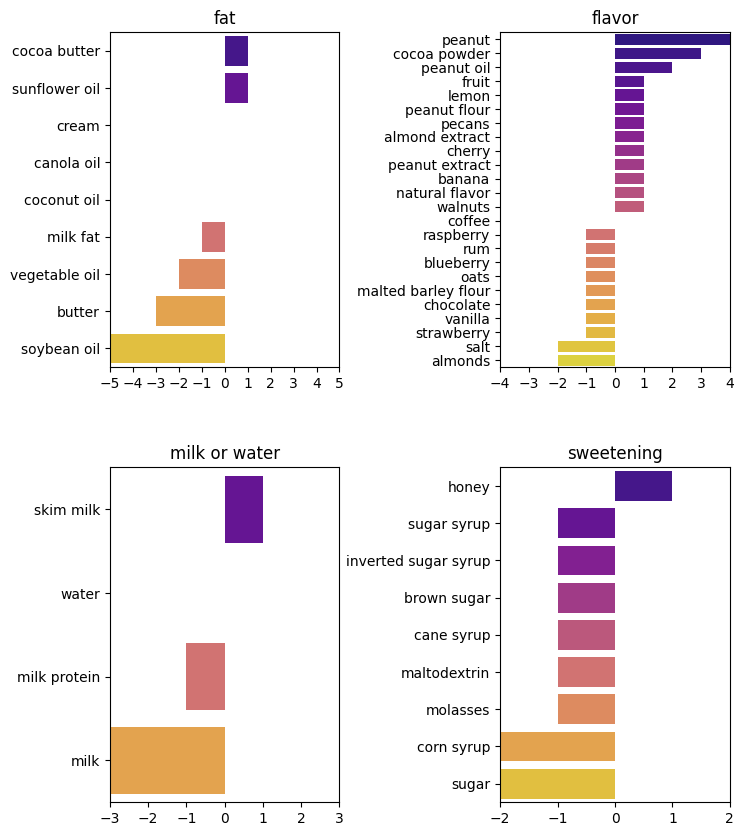

In [44]:
diff_graph_ingredients('BenJerrys', df)

HaagenDazs ingredient usage difference between top10 vs. bot10

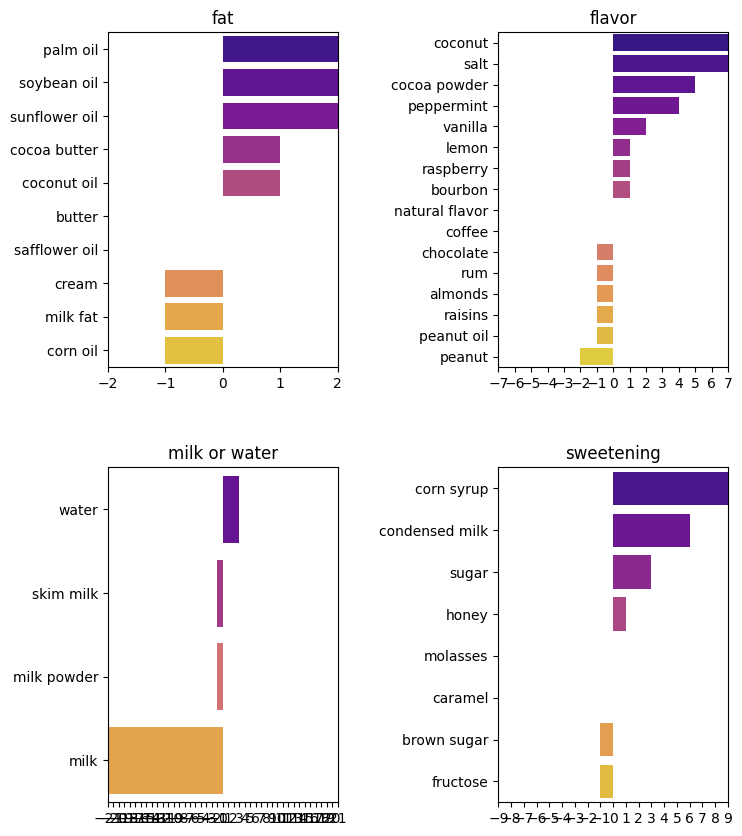

In [43]:
diff_graph_ingredients('HaagenDazs', df)

Breyers ingredient usage difference between top10 vs. bot10

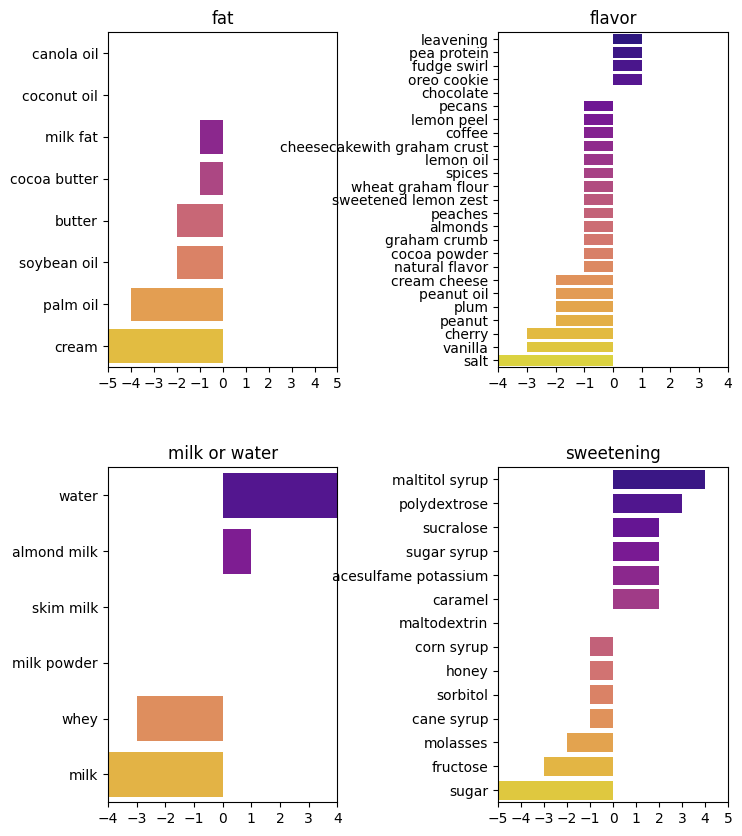

In [45]:
diff_graph_ingredients('Breyers', df)

Talenti ingredient usage difference between top10 vs. bot10

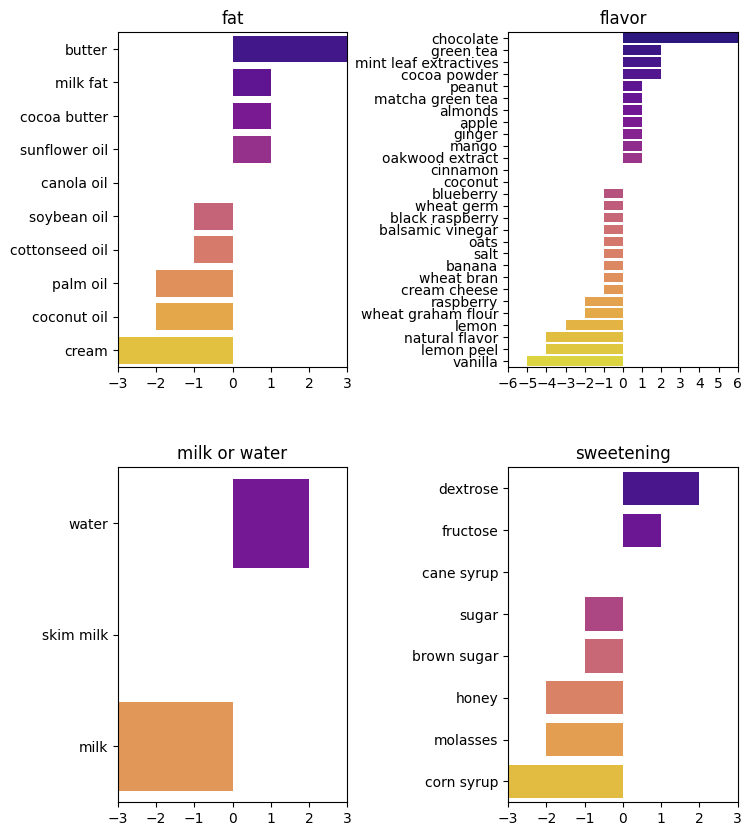

In [42]:
diff_graph_ingredients('Talenti', df)

In [39]:
#table_tb10_all = compare_top10_and_bot10_ingredients('all', df, flavor)
#table_tb10_bj = compare_top10_and_bot10_ingredients('BenJerrys', df, flavor)
#table_tb10_hd = compare_top10_and_bot10_ingredients('HaagenDazs', df, flavor)
#table_tb10_br = compare_top10_and_bot10_ingredients('Breyers', df, flavor)
#table_tb10_tl = compare_top10_and_bot10_ingredients('Talenti', df, flavor)
#table_tb10_br

In [40]:
#pd.options.display.max_rows = None
#pd.options.display.max_columns = None